# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hurricane
Processing Record 2 of Set 1 | strezhevoy
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | port saint john's
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | takamaka
City not found. Skipping...
Processing Record 10 of Set 1 | bardai
Processing Record 11 of Set 1 | jinotega
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | mejit
Processing Record 15 of Set 1 | kabala
Processing Record 16 of Set 1 | cudillero
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | la'ie
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | arteche
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hurricane,37.1753,-113.2899,280.15,72,0,1.34,US,1707794854
1,strezhevoy,60.7333,77.5889,240.91,100,100,1.79,RU,1707794854
2,edinburgh of the seven seas,-37.0676,-12.3116,290.47,76,99,5.77,SH,1707794854
3,port saint john's,-31.6229,29.5448,293.84,88,7,5.26,ZA,1707794854
4,port-aux-francais,-49.3500,70.2167,280.65,88,99,12.69,TF,1707794855


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hurricane,37.1753,-113.2899,280.15,72,0,1.34,US,1707794854
1,strezhevoy,60.7333,77.5889,240.91,100,100,1.79,RU,1707794854
2,edinburgh of the seven seas,-37.0676,-12.3116,290.47,76,99,5.77,SH,1707794854
3,port saint john's,-31.6229,29.5448,293.84,88,7,5.26,ZA,1707794854
4,port-aux-francais,-49.3500,70.2167,280.65,88,99,12.69,TF,1707794855


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

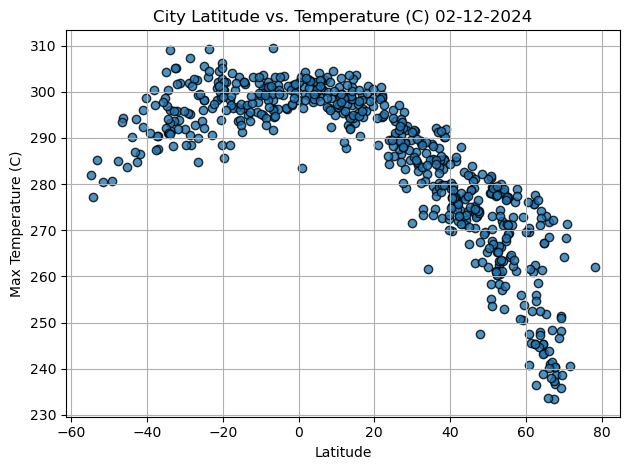

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (C) {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

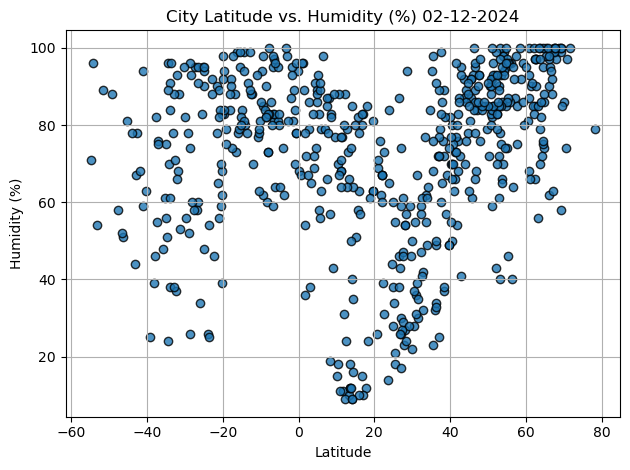

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

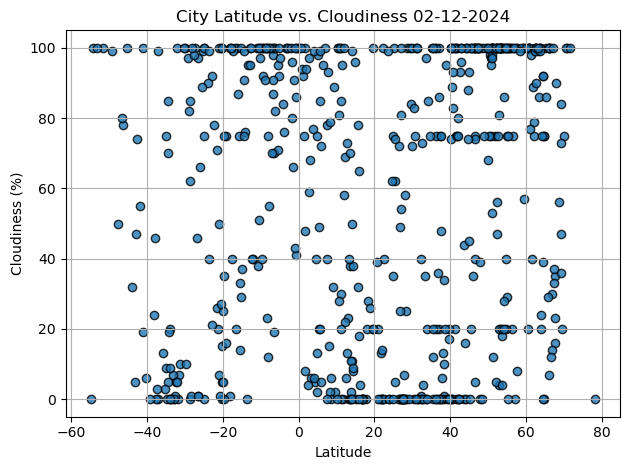

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

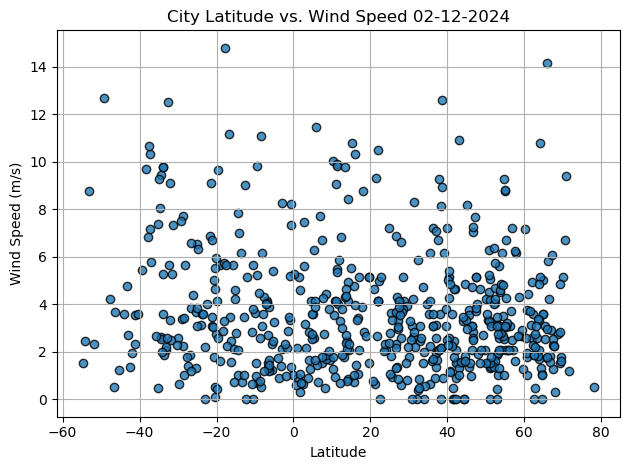

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hurricane,37.1753,-113.2899,280.15,72,0,1.34,US,1707794854
1,strezhevoy,60.7333,77.5889,240.91,100,100,1.79,RU,1707794854
7,sisimiut,66.9395,-53.6735,248.45,88,30,2.92,GL,1707794585
8,bardai,11.6500,7.2333,295.33,11,0,3.99,NG,1707794855
9,jinotega,13.0917,-86.0018,292.72,73,23,1.76,NI,1707794855


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,290.47,76,99,5.77,SH,1707794854
3,port saint john's,-31.6229,29.5448,293.84,88,7,5.26,ZA,1707794854
4,port-aux-francais,-49.3500,70.2167,280.65,88,99,12.69,TF,1707794855
5,blackmans bay,-43.0167,147.3167,294.11,67,47,2.70,AU,1707794855
6,puerto natales,-51.7236,-72.4875,280.36,89,100,2.34,CL,1707794855


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8832679971355618
The r-squared value is 0.7801623547638669


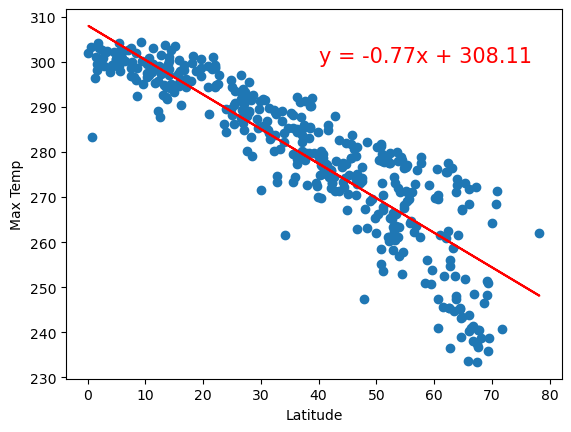

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.5127752722310477
The r-squared value is 0.26293847981162505


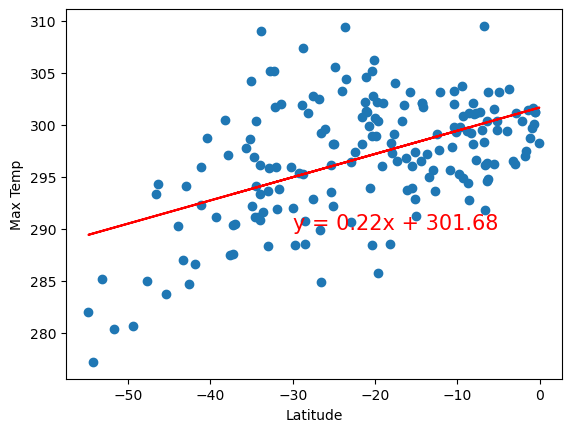

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,290),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:**
In the Northern Hemisphere, there is a strong, negative correlation between Latitude and Max Temp. Therefore, in the North, as Latitude increases and you move away from the equator, the temperature decreases. 
In the Southern Hemisphere, there is a strong, positive correlation between Latitude and Max Temperature. Therefore, in the South, as Latitude increases and you get closer to the equator, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4669624885579756
The r-squared value is 0.2180539657202575


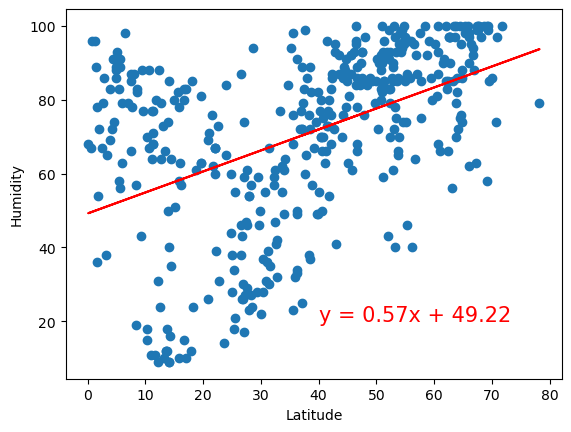

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.36048785390583293
The r-squared value is 0.12995149281363313


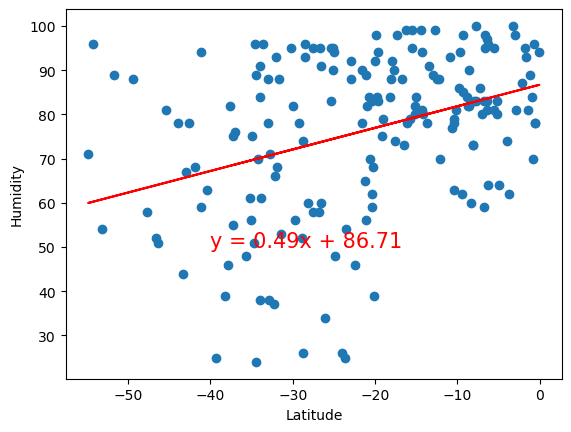

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a positive correlation between Latitude and Max Temp. Therefore, in the North, as Latitude increases and you get farther away from the equator, the humidity increases. 
In the Southern Hemisphere, there is a strong, positive correlation between Latitude and Max Temperature. Therefore, in the South, as Latitude increases and you get closer to the equator, the temperature increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.28576800689852966
The r-squared value is 0.0816633537667581


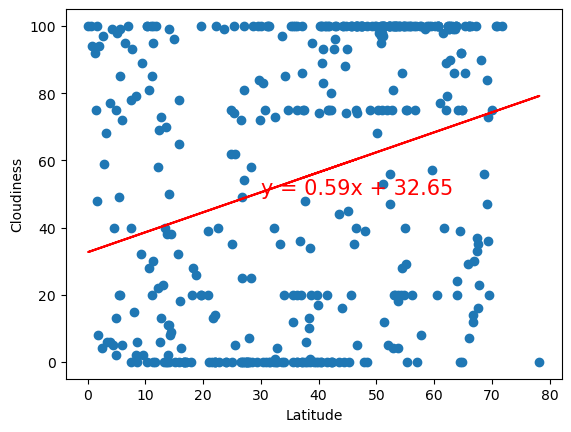

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.36241439296272016
The r-squared value is 0.13134419222653695


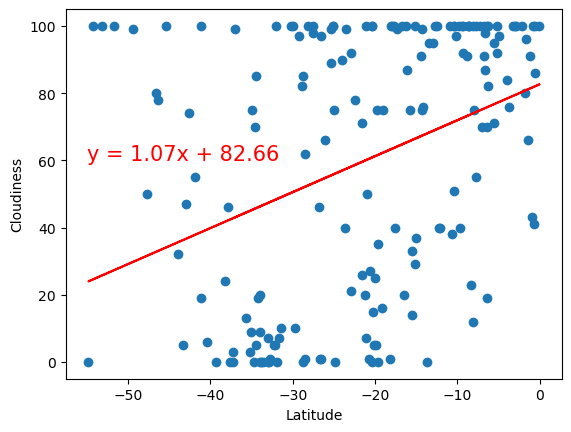

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a slightly positive correlation between Latitude and Cloudiness. Therefore, in the North, as Latitude increases and you get farther away from the equator, the cloudiness increases. 
In the Southern Hemisphere, there is a slightly positive correlation between Latitude and Cloudiness. Therefore, in the South, as Latitude increases and you get closer to the equator, the cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.05299982031614087
The r-squared value is 0.0028089809535432188


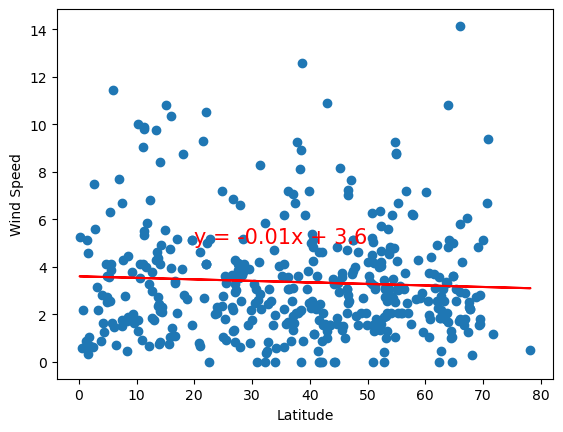

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is -0.18691071818933724
The r-squared value is 0.03493561657405384


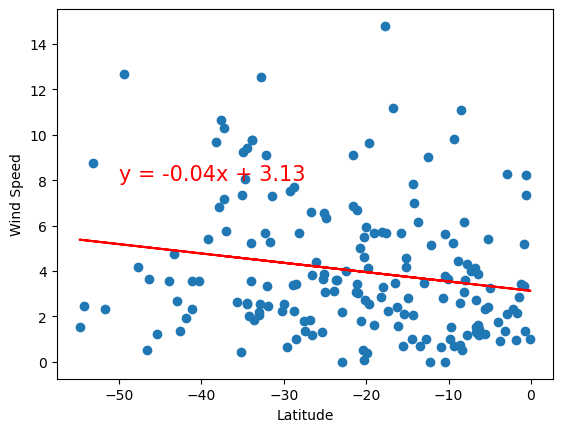

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is practically a negligible, negative correlation between Latitude and Cloudiness. Therefore, in the North, there is almost no relationship between Latitude and Windspeed.
In the Southern Hemisphere, there is a slightly negative correlation between Latitude and Cloudiness. Therefore, in the South, as Latitude increases and you get closer to the equator, the wind speed decreases. 